In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error

In [142]:
df = pd.read_csv('Housing.csv')

print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [144]:
df.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [146]:
# Display summary statistics
df.describe()

# Display information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [148]:
df.keys()


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [150]:
print(df.shape)

(545, 13)


### Columns or Features Description


```python
'price': The price of the house (target variable).

'area': The area or size of the house in square feet.

'bedrooms': The number of bedrooms in the house.

'bathrooms': The number of bathrooms in the house.

'stories': The number of stories or floors in the house.

'mainroad': Categorical variable indicating whether the house is located near the main road or not.

'guestroom': Categorical variable indicating whether the house has a guest room or not.

'basement': Categorical variable indicating whether the house has a basement or not.

'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.

'airconditioning': Categorical variable indicating whether the house has air conditioning or not.

'parking': The number of parking spaces available with the house.

'prefarea': Categorical variable indicating whether the house is in a preferred area or not.

'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).
```

In [153]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


### Checking for Null entries

In [156]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [158]:
df.isnull().sum() == True

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

###  Performing Exploratory Data Analysis


#### Handling Binary Categorical Variables (Yes/No) Categories

In [162]:
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [164]:
def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.
    
    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.
    
    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

### {'yes' : 1, 'no' : 0}; here '{}' used to create the dictionary which have key and value as yes and no.


In [167]:
df[categorical_col] = df[categorical_col].apply(binary_map)


df[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


## Unpacking the furnishingstatus 

In [170]:
df.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


### Creating Dummy Variables

In [173]:
dummy_col = pd.get_dummies(df['furnishingstatus'])
dummy_col.head()


,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


### Concatenating Dummy Variables with Original DataFrame

In [176]:
df = pd.concat([df, dummy_col], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,True,False,False


### Dropping the Original Categorical Column

In [179]:
df.drop(['furnishingstatus'], axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


## Again Handling Binary Categorical Variables (True/False) Categories

In [182]:
categorical_col_2 =  ['furnished', 'semi-furnished', 'unfurnished']
df[categorical_col_2]

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
540,False,False,True
541,False,True,False
542,False,False,True
543,True,False,False


In [184]:
def binary_map(x):
    return x.map({True: 1, False: 0})

In [186]:
df[categorical_col_2] = df[categorical_col_2].apply(binary_map)


df[categorical_col_2]

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [188]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


## Splitting data into Training and Testing data

In [191]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [193]:
np.random.seed(0)

df_train, df_test = train_test_split(df, train_size=0.83, test_size=0.17, random_state=100)
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
341,3850000,3180,2,2,1,1,0,1,0,0,2,0,0,1,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0,0,1,0
417,3395000,3640,2,1,1,1,0,0,0,0,0,0,1,0,0
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,0,1,0
388,3500000,3650,3,1,2,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,3180,2,1,1,1,0,0,0,0,0,0,0,0,1
53,7350000,5150,3,2,4,1,0,0,0,1,2,0,0,1,0
350,3780000,3420,2,1,2,1,0,0,1,0,1,0,0,1,0
79,6650000,6000,3,2,3,1,1,0,0,1,0,0,1,0,0


In [195]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,0,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,0,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,0,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,4893000,4995,4,2,1,1,0,1,0,0,0,0,0,1,0
470,3010000,5076,3,1,1,0,0,0,0,0,0,0,0,0,1
483,2940000,6615,3,1,2,1,0,0,0,0,0,0,0,1,0
404,3493000,4900,3,1,2,0,0,0,0,0,0,0,0,0,1


In [197]:
df_train.shape

(452, 15)

In [199]:
df_test.shape  

(93, 15)

## Scaling Training data using MinMax Scaler

In [202]:
scaler = MinMaxScaler()
col_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',	'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished']
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])


## Training The Model

In [205]:
y_train = df_train.pop('price')

x_train = df_train

In [207]:
linear_regression = LinearRegression()

In [209]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [211]:
coefficients = linear_regression.coef_

print(coefficients)

[ 0.30029217  0.04716626  0.29210329  0.10559759  0.04829761  0.03179398
  0.02481741  0.07404787  0.07430603  0.06098807  0.04980471  0.01354427
  0.00737336 -0.02091763]


### R² value on the Training Data

In [214]:
score = linear_regression.score(x_train, y_train)
print("R² Score:", score)

R² Score: 0.6764131977791616


### Scaling the Test Data: MinMaxScaler

In [217]:
col_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',	'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished']

df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])

### Testing the Model

In [220]:
y_test = df_test.pop('price')
x_test = df_test

prediction = linear_regression.predict(x_test)

print(prediction)

[0.19291958 0.48275799 0.33710772 0.30205519 0.27770246 0.18871828
 0.61122668 0.40968335 0.14828577 0.33994773 0.10330862 0.39617164
 0.30905756 0.49669521 0.34410939 0.54935164 0.62042733 0.23090973
 0.37721552 0.28875945 0.22400255 0.09812868 0.24999158 0.1593557
 0.08349942 0.14477415 0.3088896  0.463612   0.47202296 0.2914752
 0.10844962 0.24669669 0.10415681 0.08045634 0.26640227 0.26044417
 0.30205294 0.137335   0.13932664 0.22881333 0.11471473 0.46907662
 0.42438944 0.10449125 0.07790258 0.23144382 0.24552887 0.34026105
 0.12706622 0.38321037 0.01625077 0.4684368  0.41760285 0.41716644
 0.51133295 0.28596785 0.3847398  0.08887313 0.07724891 0.21308328
 0.08942282 0.17991529 0.53054507 0.50026337 0.10959465 0.12914267
 0.43805374 0.08493952 0.0648663  0.4156984  0.07547779 0.46289614
 0.19802987 0.14754389 0.29650043 0.22211498 0.48924852 0.62816372
 0.80880812 0.32981793 0.60504269 0.08535546 0.0912249  0.09903888
 0.28434728 0.13202515 0.1468981  0.35401583 0.34003498 0.078598

### R² and MSE values on the Test Data

In [223]:
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print("Mean Squared Error:", mse)
print("R² Score on Test Data:", r2)


Mean Squared Error: 0.012482087416217626
R² Score on Test Data: 0.6515389979705328


In [225]:
y_test.shape

y_test_matrix = y_test.values.reshape(-1, 1)

y_test_matrix.shape

(93, 1)

In [227]:
comparison_df = pd.DataFrame({'Actual': y_test_matrix.flatten(), 'Predicted': prediction.flatten()})

comparison_df.head(10)

,Actual,Predicted
0,0.248485,0.192920
1,0.531987,0.482758
2,0.329966,0.337108
3,0.262626,0.302055
4,0.246465,0.277702
5,0.276094,0.188718
6,0.646465,0.611227
7,0.329966,0.409683
8,0.087542,0.148286
9,0.397306,0.339948


### Plot the Graphs between The Actual Values and The Predicted Values

Text(0, 0.5, 'Predicted')

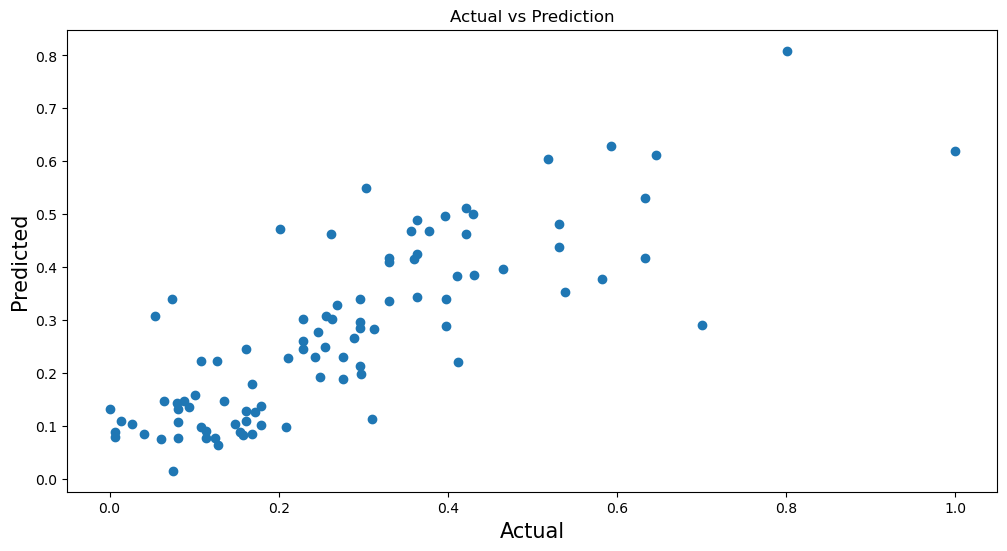

In [230]:
fig = plt.figure(figsize = (12, 6))

# Scatter plot of actual versus predicted values
plt.scatter(y_test, prediction)

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)

# Comparison between the Different Models

### Creating the K - Neighbour and Decision Tree Model

In [234]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#### Using K-n model

In [237]:
knn_model = KNeighborsRegressor(n_neighbors=4) 
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
print(" Mean Squared Error : ", knn_mse)
print(" R² Score : ", knn_r2)

 Mean Squared Error :  0.011602844634071978
 R² Score :  0.6760847178230933


#### Decision Tree Model

In [240]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(" Mean Squared Error : ", dt_mse)
print(" R² Score : ", dt_r2)

 Mean Squared Error :  0.020622384337199155
 R² Score :  0.4242872629588772


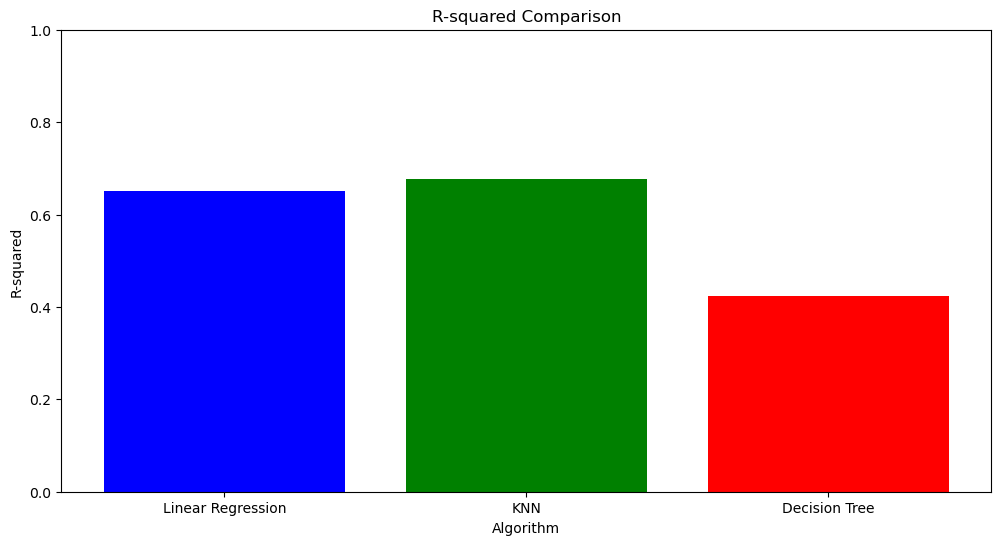

In [242]:
algorithms = ['Linear Regression', 'KNN', 'Decision Tree']
r2_scores = [r2, knn_r2, dt_r2]

plt.figure(figsize=(12, 6))
plt.bar(algorithms, r2_scores, color=['blue', 'green', 'red'])
plt.title('R-squared Comparison')
plt.xlabel('Algorithm')
plt.ylabel('R-squared')
plt.ylim(0, 1)  
plt.show()

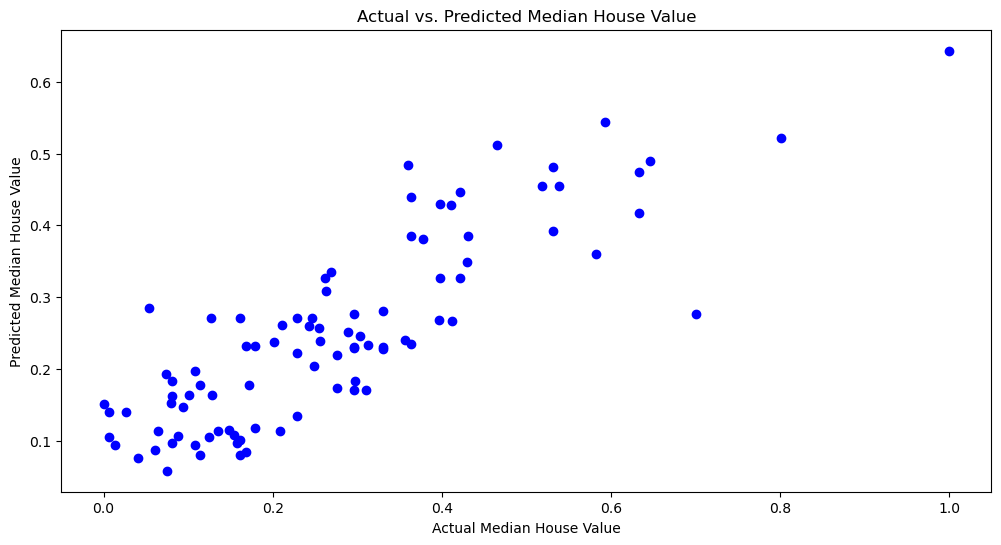

In [244]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, knn_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

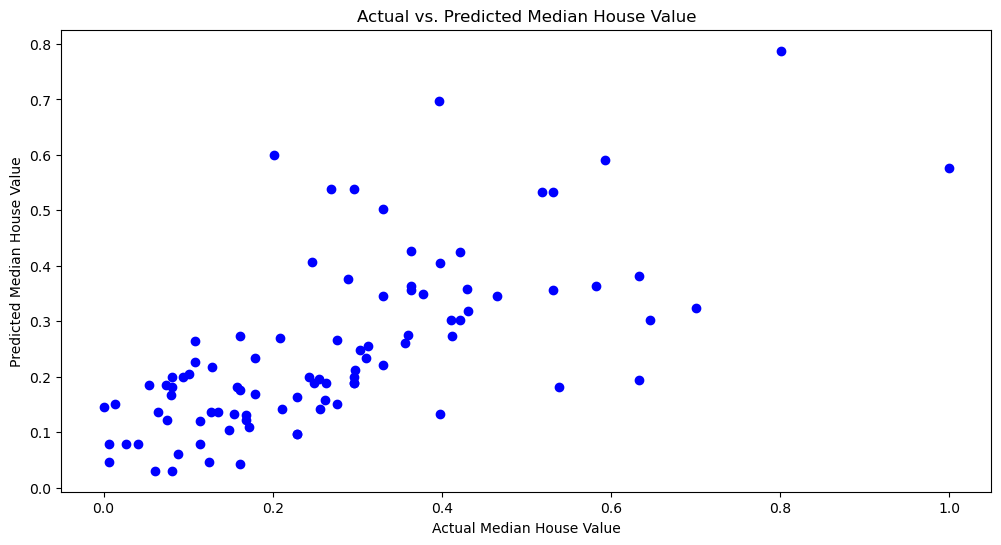

In [246]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, dt_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()